In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

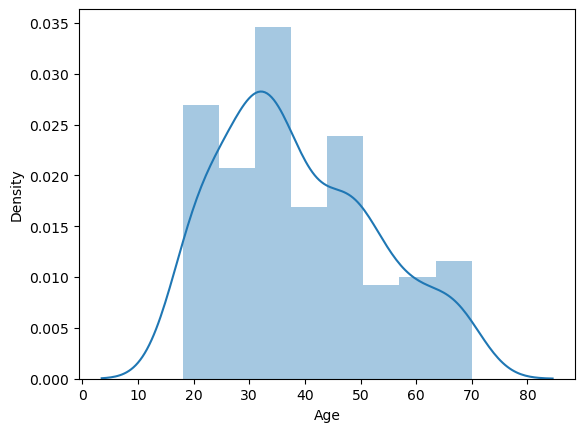

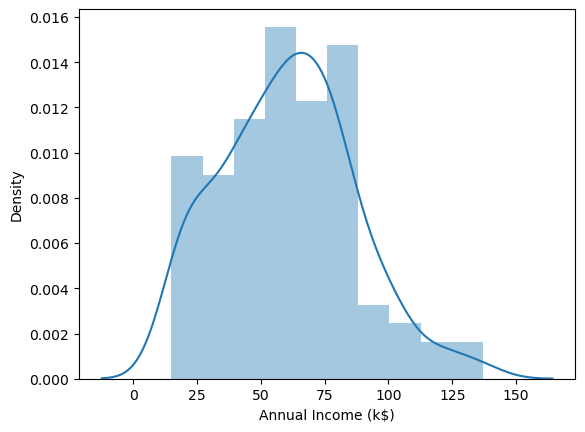

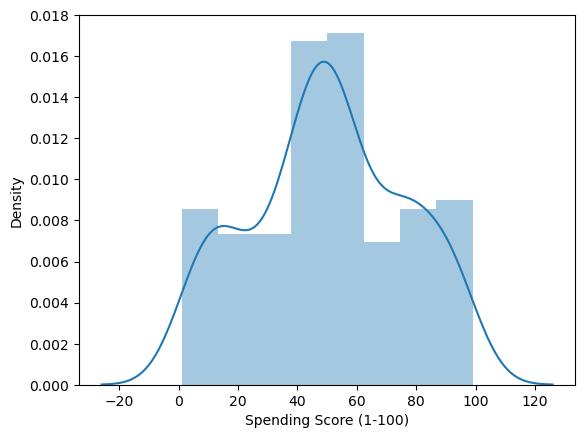

In [8]:
columns = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
for i in columns :
    plt.figure()
    sns.distplot(df[i])

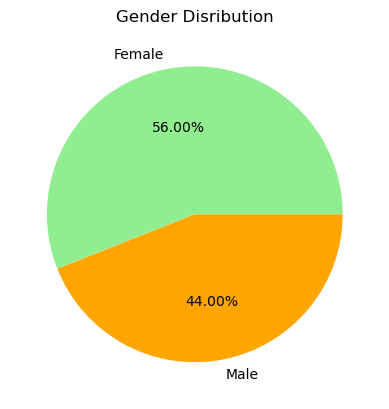

In [9]:
df1 = df.groupby('Gender').size()

df1.plot(kind='pie', subplots = True, 
       colors = ['lightgreen', 'orange'],
       explode = [0, 0.001],
       labels = ['Female', 'Male'],
       autopct = '%.2f%%' )
plt.title("Gender Disribution")
plt.ylabel("")
plt.show()

## KMeans Clustering

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [13]:
from sklearn.cluster import KMeans

In [14]:
k_means = KMeans()
k_means.fit(X)

KMeans()

In [16]:
k_means = KMeans(n_clusters = 5)
k_means.fit_predict(X)

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

## Elbow Method

In [17]:
wcss = []
for i in range (1,11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [18]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25063.652515864094,
 21850.165282585636,
 19704.123543147773]

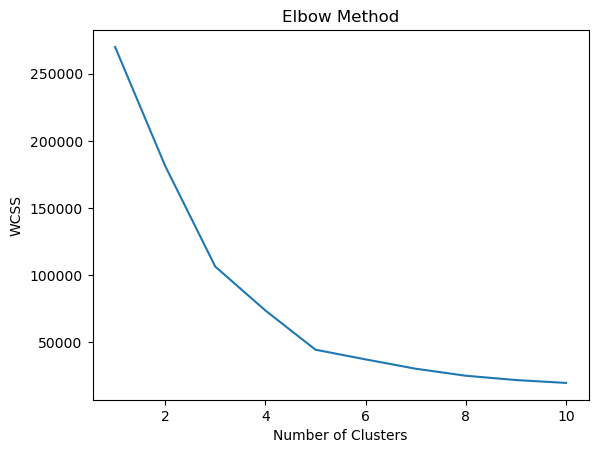

In [20]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## Model Training 

In [21]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [22]:
k_means = KMeans(n_clusters=5,random_state=42)
y_means = k_means.fit_predict(X)
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

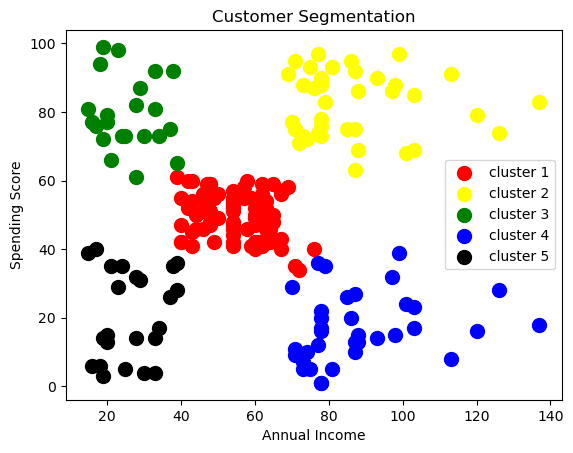

In [29]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label="cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='yellow',label="cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='green',label="cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c='blue',label="cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100,c='black',label="cluster 5")

plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()

In [31]:
k_means.predict([[15,39]])

array([4])

In [33]:
X = df[['Age','Spending Score (1-100)']]
X

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [34]:
k_means = KMeans(n_clusters=5,random_state=42)
y_means = k_means.fit_predict(X)
y_means

array([2, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 2, 1, 0, 1, 0,
       3, 0, 3, 0, 1, 2, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 1, 2,
       1, 2, 4, 2, 2, 2, 4, 2, 2, 4, 1, 1, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2,
       1, 4, 2, 2, 4, 1, 4, 4, 4, 2, 1, 1, 2, 1, 4, 2, 4, 1, 2, 1, 4, 2,
       2, 1, 4, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 2, 1, 2, 2, 2, 4, 4, 1, 4, 2, 1, 2, 0, 2, 0, 1, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 1, 2, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0,
       3, 0])

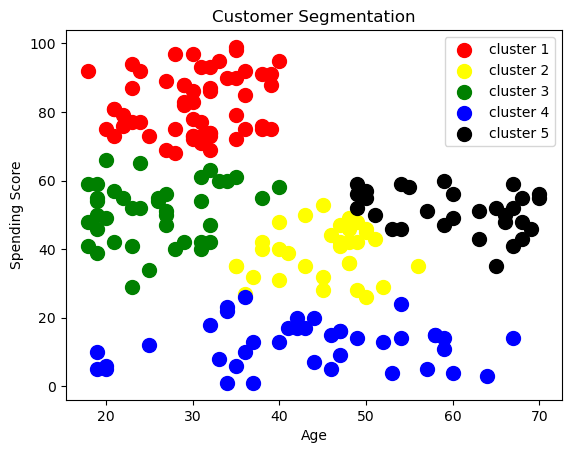

In [35]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label="cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='yellow',label="cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='green',label="cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c='blue',label="cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100,c='black',label="cluster 5")

plt.title("Customer Segmentation")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()